# #Importing Packages:

In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
#importing the classes and functions we intend to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

This dataset is comprised of 8 input variables that describe medical details of patients and one output variable to indicate whether the patient will have an onset of diabetes within 5 years.

You can learn more about this dataset on the UCI Machine Learning Repository website.

In [67]:
dataset = pd.read_csv("C:/Users/antar/Downloads/ML Projects/ANTARA/Pima-Indian-Diabetes/diabetes.csv")
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [68]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [69]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [70]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [71]:
dataset.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [72]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Data Visualization and Identifying Patterns

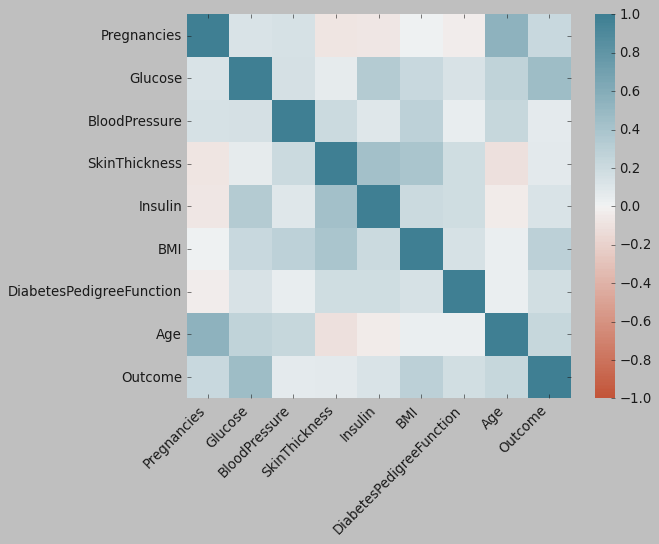

In [73]:
import seaborn as sns
corr = dataset.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

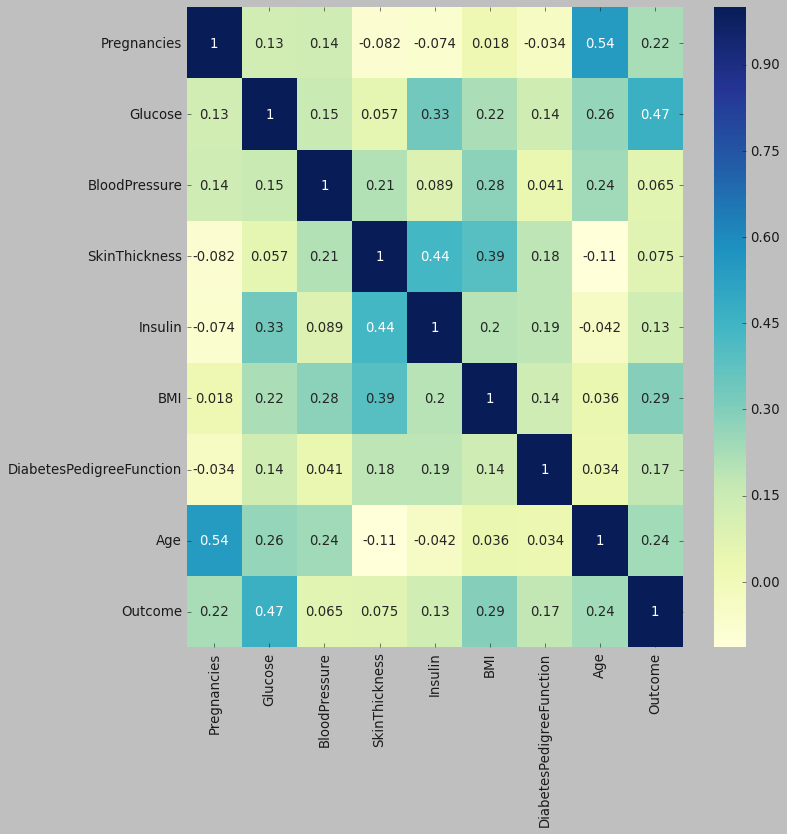

In [74]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(), cmap="YlGnBu", annot= True,)
plt.show()

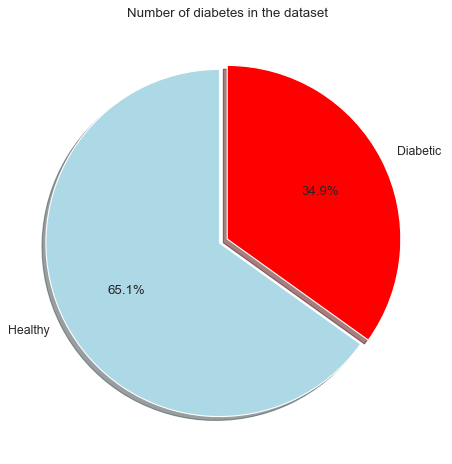

In [75]:
sns.set(style="whitegrid")
labels = ['Healthy', 'Diabetic']
sizes = dataset['Outcome'].value_counts(sort = True)

colors = ["lightblue","red"]
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Number of diabetes in the dataset')
plt.show()

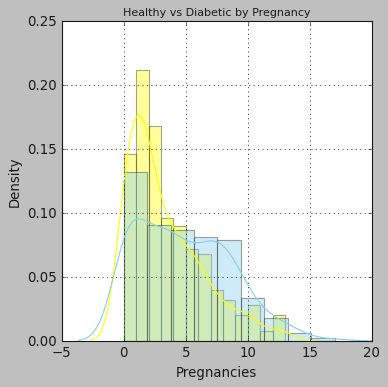

In [145]:
#Distribution Plots - for all the variables
plt.style.use("classic")
plt.figure(figsize=(5,5))

sns.distplot(dataset[dataset['Outcome'] == 0]["Pregnancies"], color='yellow') # Healthy - Yellow
sns.distplot(dataset[dataset['Outcome'] == 1]["Pregnancies"], color='skyblue') # Diabetic - skyblue

plt.title('Healthy vs Diabetic by Pregnancy', fontsize=10)
plt.xlim([-5,20])
plt.grid(linewidth = 0.7)
plt.show()

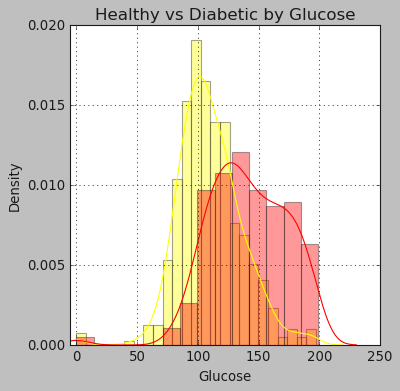

In [146]:
plt.style.use("classic")
plt.figure(figsize=(5,5))

sns.distplot(dataset[dataset['Outcome'] == 0]["Glucose"], color='yellow') # Healthy - yellow
sns.distplot(dataset[dataset['Outcome'] == 1]["Glucose"], color='red') # Diabetic - Red

plt.title('Healthy vs Diabetic by Glucose', fontsize=15)
plt.xlim([-5,250])
plt.grid(linewidth = 0.7)
plt.show()

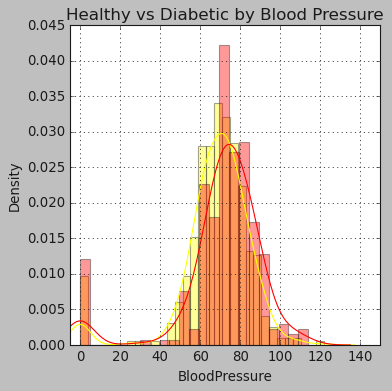

In [147]:
plt.style.use("classic")
plt.figure(figsize=(5,5))

sns.distplot(dataset[dataset['Outcome'] == 0]["BloodPressure"], color='yellow') # Healthy - yellow
sns.distplot(dataset[dataset['Outcome'] == 1]["BloodPressure"], color='red') # Diabetic - Red

plt.title('Healthy vs Diabetic by Blood Pressure', fontsize=15)
plt.xlim([-5,150])
plt.grid(linewidth = 0.7)
plt.show()


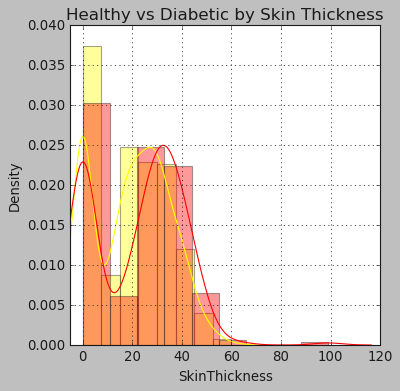

In [149]:
plt.style.use("classic")
plt.figure(figsize=(5,5))

sns.distplot(dataset[dataset['Outcome'] == 0]["SkinThickness"], color='yellow') # Healthy - yellow
sns.distplot(dataset[dataset['Outcome'] == 1]["SkinThickness"], color='red') # Diabetic - Red

plt.title('Healthy vs Diabetic by Skin Thickness', fontsize=15)
plt.xlim([-5,120])
plt.grid(linewidth = 0.7)
plt.show()

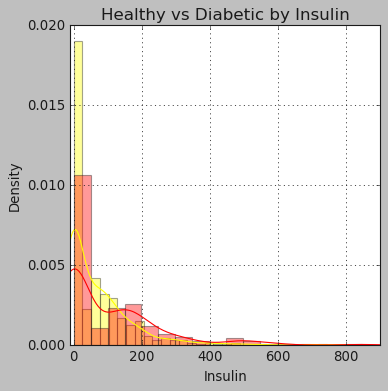

In [150]:
plt.style.use("classic")
plt.figure(figsize=(5,5))

sns.distplot(dataset[dataset['Outcome'] == 0]["Insulin"], color='yellow') # Healthy - yellow
sns.distplot(dataset[dataset['Outcome'] == 1]["Insulin"], color='red') # Diabetic - Red

plt.title('Healthy vs Diabetic by Insulin', fontsize=15)
plt.xlim([-10,900])
plt.grid(linewidth = 0.7)
plt.show()

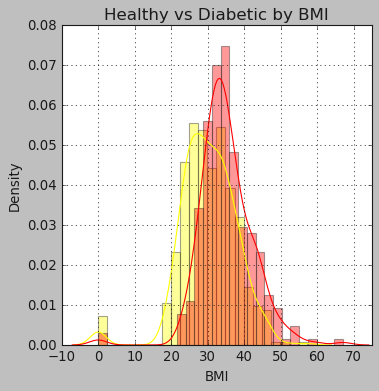

In [151]:
plt.style.use("classic")
plt.figure(figsize=(5,5))

sns.distplot(dataset[dataset['Outcome'] == 0]["BMI"], color='yellow') # Healthy - yellow
sns.distplot(dataset[dataset['Outcome'] == 1]["BMI"], color='red') # Diabetic - Red

plt.title('Healthy vs Diabetic by BMI', fontsize=15)
plt.xlim([-10,75])
plt.grid(linewidth = 0.7)
plt.show()

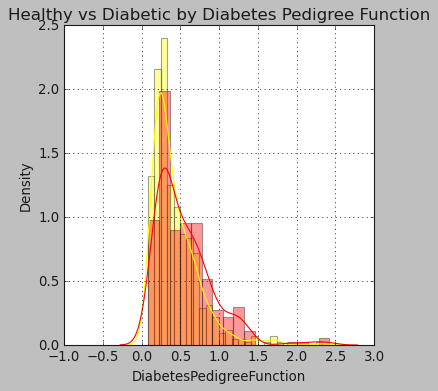

In [152]:
plt.style.use("classic")
plt.figure(figsize=(5,5))

sns.distplot(dataset[dataset['Outcome'] == 0]["DiabetesPedigreeFunction"], color='yellow') # Healthy - yellow
sns.distplot(dataset[dataset['Outcome'] == 1]["DiabetesPedigreeFunction"], color='red') # Diabetic - Red

plt.title('Healthy vs Diabetic by Diabetes Pedigree Function', fontsize=15)
plt.xlim([-1,3])
plt.grid(linewidth = 0.7)
plt.show()

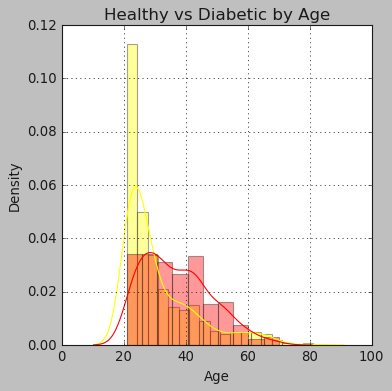

In [153]:
plt.style.use("classic")
plt.figure(figsize=(5,5))

sns.distplot(dataset[dataset['Outcome'] == 0]["Age"], color='yellow') # Healthy - yellow
sns.distplot(dataset[dataset['Outcome'] == 1]["Age"], color='red') # Diabetic - Red

plt.title('Healthy vs Diabetic by Age', fontsize=15)
plt.xlim([0,100])
plt.grid(linewidth = 0.7)
plt.show()

# Outlier Detection

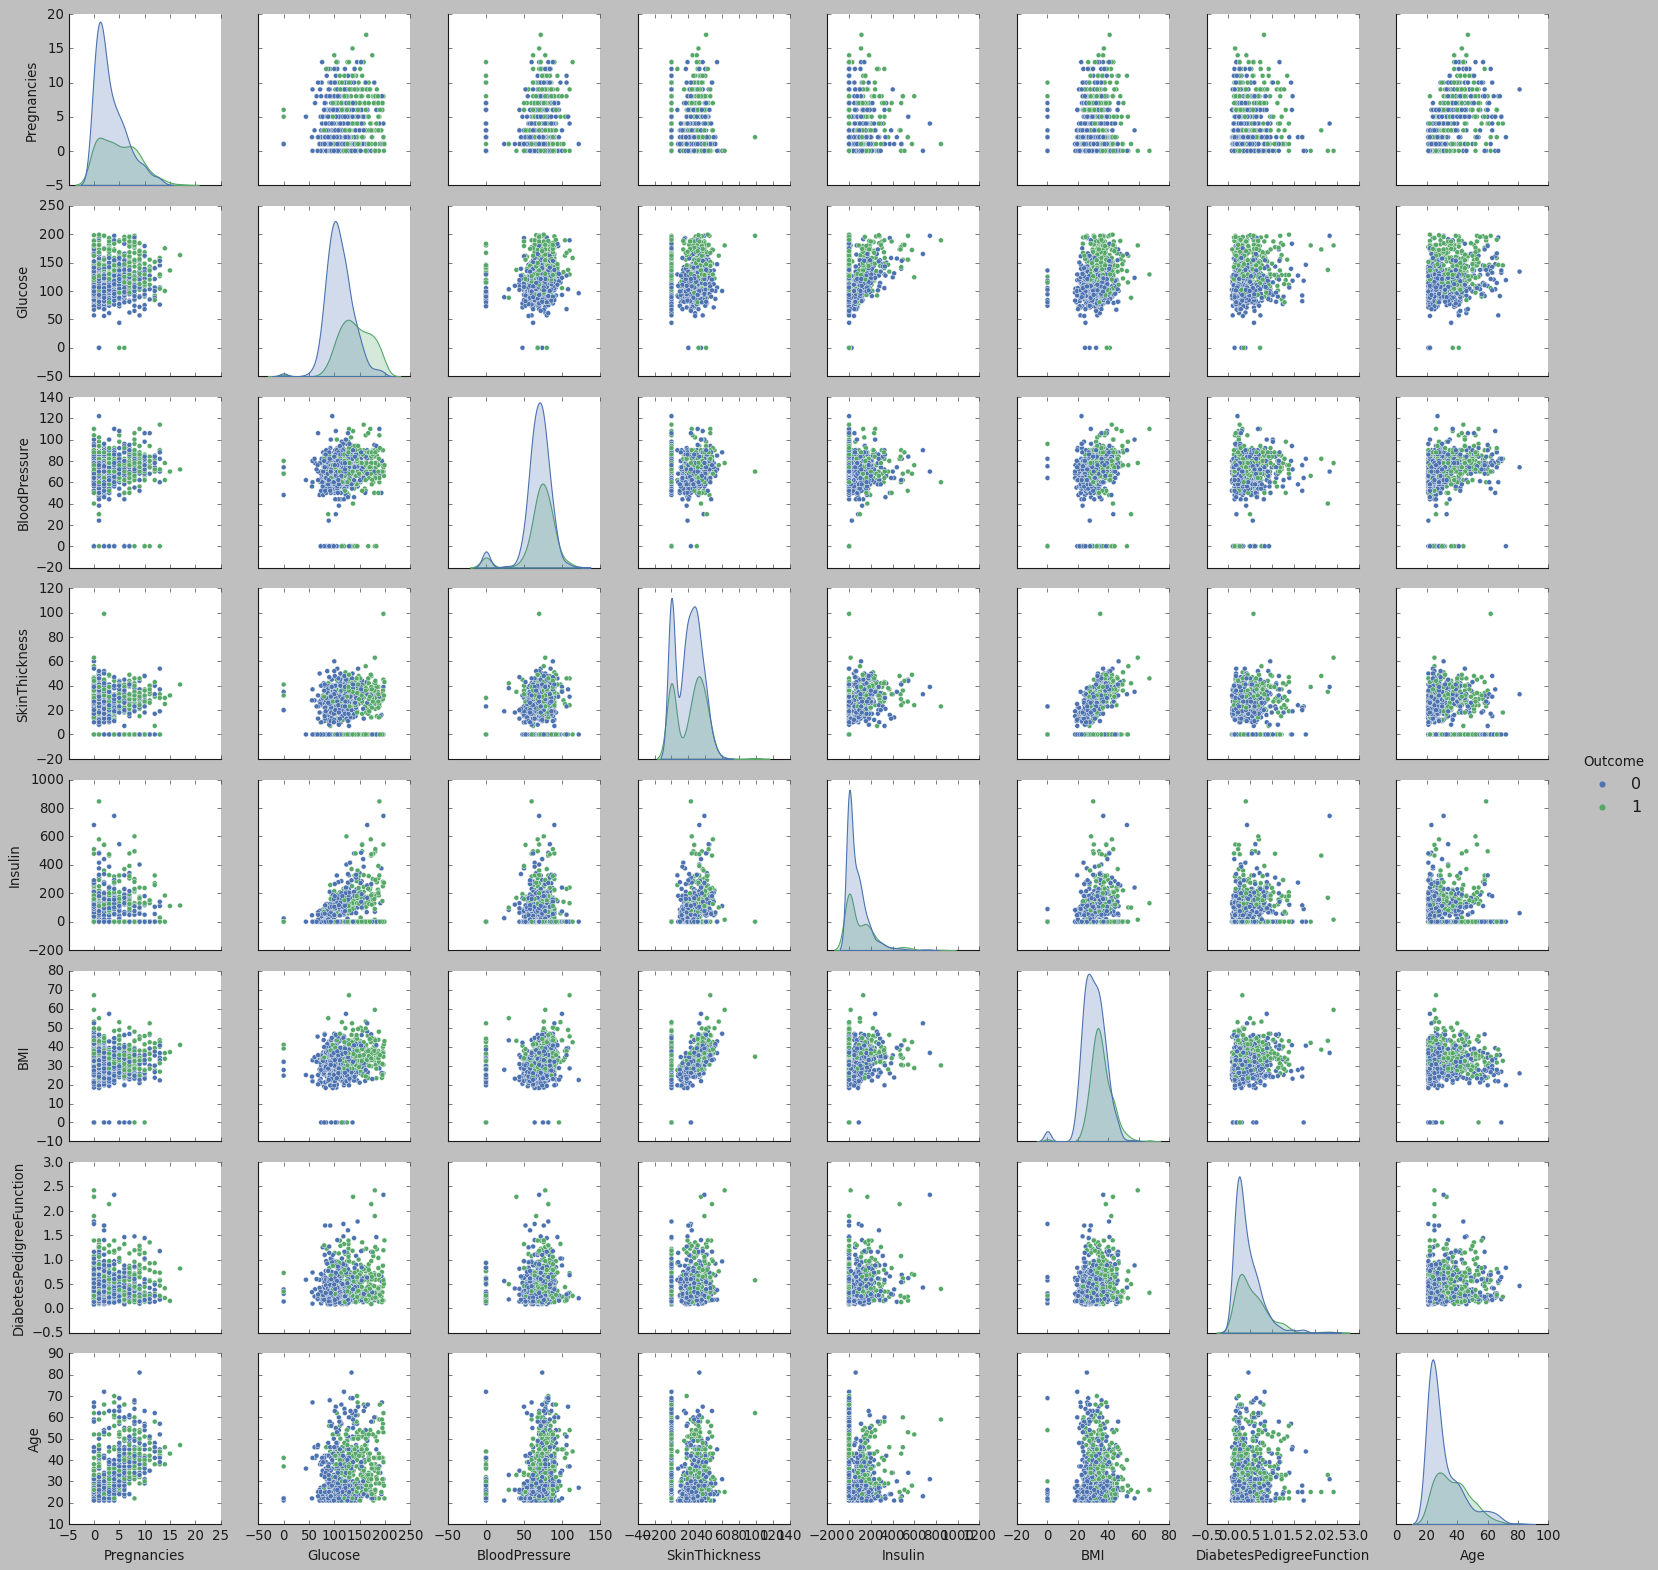

In [78]:
sns.pairplot(dataset, hue = 'Outcome', data = dataset)
plt.show()

# Data Splitting

In [10]:
# split data into X and y
X = dataset.iloc[:,0:8]
Y = dataset.iloc[:,8]


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [20]:
# split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

# Feature Scaling

In [80]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model Selection

In [88]:
pip install lightgbm 

Note: you may need to restart the kernel to use updated packages.


In [89]:
import lightgbm as lgb

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [91]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

In [95]:
models = []
models.append(['Logistic Regreesion', LogisticRegression(random_state=0)])
models.append(['SVM', SVC(random_state=0)])
models.append(['KNeighbors', KNeighborsClassifier()])
models.append(['GaussianNB', GaussianNB()])
models.append(['BernoulliNB', BernoulliNB()])
models.append(['Decision Tree', DecisionTreeClassifier(random_state=0)])
models.append(['Random Forest', RandomForestClassifier(random_state=0)])
models.append(['Extra Tree', ExtraTreesClassifier(random_state=0)])
models.append(['AdaBoost', AdaBoostClassifier(random_state=0)])
models.append(['Gradiesnt Boost', GradientBoostingClassifier(random_state=0)])
models.append(['Light GBM', LGBMClassifier(random_state=0)])
models.append(['XGBoost', XGBClassifier(eval_metric= 'error')])

lst_1= []
for m in range(len(models)):
    lst_2= []
    model = models[m][1]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)   #K-Fold Validation
    roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
    precision = precision_score(y_test, y_pred)  #Precision Score
    recall = recall_score(y_test, y_pred)  #Recall Score
    f1 = f1_score(y_test, y_pred)  #F1 Score
    
    lst_2.append(models[m][0])
    lst_2.append((accuracy_score(y_test, y_pred))*100) 
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

In [96]:
df = pd.DataFrame(lst_1, columns= ['Model', 'Accuracy', 'K-Fold Mean Accuracy', 'Std. Deviation', 'ROC AUC', 'Precision', 'Recall', 'F1'])

In [97]:
df.sort_values(by= ['Accuracy', 'K-Fold Mean Accuracy'], inplace= True, ascending= False)

In [98]:
df

,Model,Accuracy,K-Fold Mean Accuracy,Std. Deviation,ROC AUC,Precision,Recall,F1
0,Logistic Regreesion,78.346457,77.613122,6.187691,0.750403,0.734177,0.630435,0.678363
9,Gradiesnt Boost,77.559055,74.102564,7.005173,0.753623,0.696629,0.673913,0.685083
7,Extra Tree,76.377953,75.294118,7.457675,0.732622,0.695122,0.619565,0.655172
6,Random Forest,75.984252,74.702112,6.266815,0.731884,0.682353,0.630435,0.655367
1,SVM,75.590551,76.266968,4.736901,0.717056,0.697368,0.576087,0.630952
3,GaussianNB,74.409449,75.889894,4.537570,0.724235,0.645161,0.652174,0.648649
11,XGBoost,74.015748,72.944947,5.401779,0.714104,0.647727,0.619565,0.633333
10,Light GBM,72.834646,71.180241,6.782952,0.707193,0.623656,0.630435,0.627027
8,AdaBoost,72.440945,75.667421,6.112740,0.697061,0.625000,0.597826,0.611111
5,Decision Tree,71.653543,72.575415,5.869554,0.686192,0.616279,0.576087,0.595506


# Decision Tree Classifier

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [100]:
# build Decision tree model
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train, y_train)

In [101]:
# prediction
y_pred = classifier.predict(X_test)
print(y_pred)

[0 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0
 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0
 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0
 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0
 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1]


In [102]:
# confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

# accuracy
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

[[126  36]
 [ 39  53]]
Accuracy: 0.7047244094488189


In [103]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [104]:
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction','Outcome']

In [134]:
#from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
features = dataset.columns
features = features[:-1]
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = dataset.columns[:-1],class_names=dataset.Output)#class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())
#fig = plt.figure(figsize=(25,20))
#_ = tree.plot_tree(classifier, 
                   feature_names=features,  
                  # class_names=dataset.Outcome,
                   filled=True)

IndentationError: unexpected indent (Temp/ipykernel_38904/2231369605.py, line 17)

In [117]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [124]:
text_representation = tree.export_text(classifier)    #text representation
print(text_representation)

|--- feature_1 <= 0.25
|   |--- feature_7 <= -0.36
|   |   |--- feature_5 <= -0.15
|   |   |   |--- feature_0 <= 1.15
|   |   |   |   |--- feature_6 <= 0.64
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_6 >  0.64
|   |   |   |   |   |--- feature_0 <= -0.38
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_0 >  -0.38
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  1.15
|   |   |   |   |--- class: 1
|   |   |--- feature_5 >  -0.15
|   |   |   |--- feature_6 <= 1.30
|   |   |   |   |--- feature_3 <= -0.77
|   |   |   |   |   |--- feature_1 <= -0.28
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_1 >  -0.28
|   |   |   |   |   |   |--- feature_1 <= 0.12
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_1 >  0.12
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_3 >  -0.77
|   |   |   |   |   |--- feature_6 <= 0.12
|   |   |   |   |   |   |--- feature_5 <= -0.13

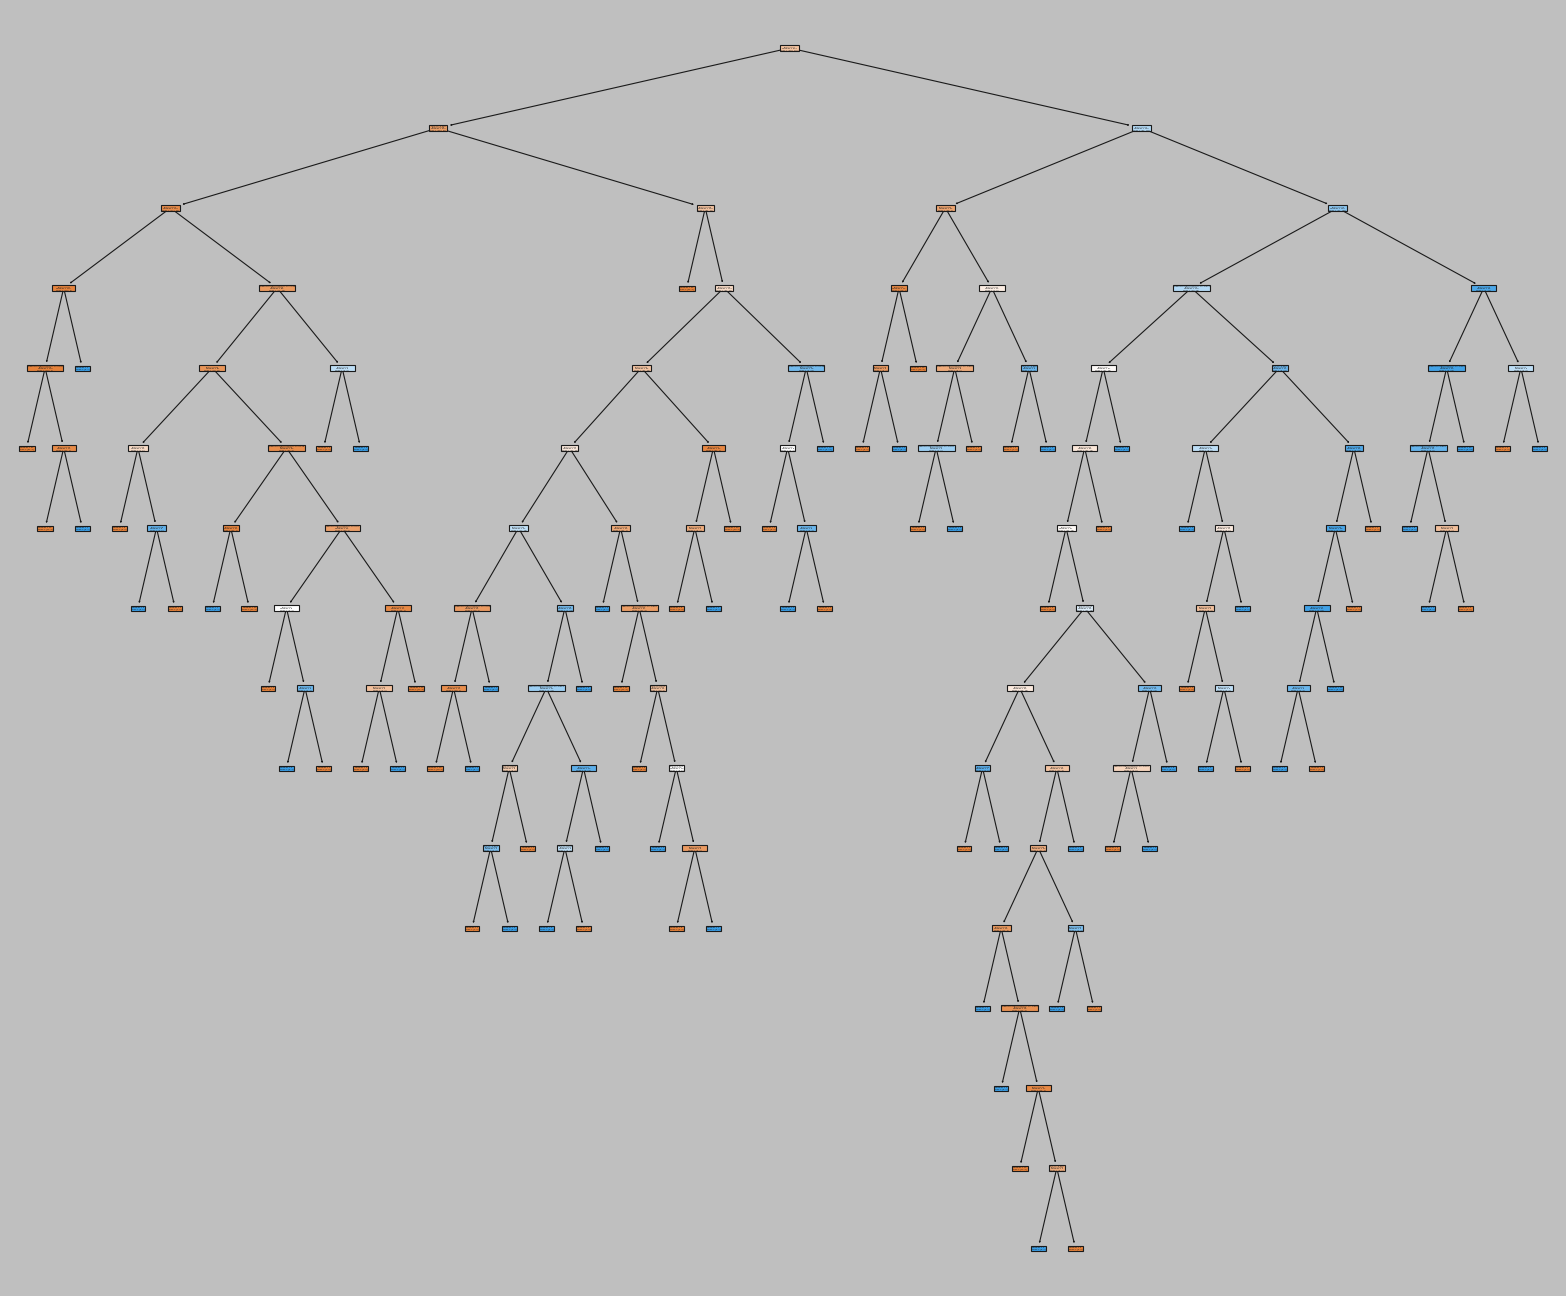

In [127]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier, 
                   feature_names=features,  
                  # class_names=dataset.Outcome,
                   filled=True)

# XGBoost Model

Train the XGBoost Model.
XGBoost provides a wrapper class to allow models to be treated like classifiers or regressors in the scikit-learn framework.

This means we can use the full scikit-learn library with XGBoost models.

The XGBoost model for classification is called XGBClassifier. We can create and and fit it to our training dataset. Models are fit using the scikit-learn API and the model.fit() function.

Parameters for training the model can be passed to the model in the constructor. Here, we use the sensible defaults.

In [139]:
# fit model no training data
import warnings
warnings.filterwarnings("ignore")
model = XGBClassifier()
model.fit(X_train, y_train)

[15:03:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [140]:
print(model)  #the parameters used in a trained model.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


To make predictions we use the scikit-learn function model.predict().

By default, the predictions made by XGBoost are probabilities. Because this is a binary classification problem, each prediction is the probability of the input pattern belonging to the first class. We can easily convert them to binary class values by rounding them to 0 or 1.

In [141]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

Now that we have used the fit model to make predictions on new data, we can evaluate the performance of the predictions by comparing them to the expected values. For this we will use the built in accuracy_score() function in scikit-learn.

In [142]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 74.02%
